In [1]:
from clustimage import Clustimage
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

cl = Clustimage(method='pca-hog', params_pca={'n_components': 0.95}, params_hog={'orientations': 8, 'pixels_per_cell': (8, 8), 'cells_per_block': (1, 1)})

image_folder = "/Users/wanc/Desktop/Data Analytics/Dog_Cat/Petimages_DogCat"

pathnames = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith((".jpg", ".jpeg", ".png")):
            pathnames.append(os.path.join(root, file))
            
labels = [0 if 'Cat' in pathname else 1 for pathname in pathnames]

[clustimage] >WARNING> Parameter grayscale is set to True because you are using method="pca-hog"


In [2]:
results = cl.fit_transform(pathnames, evaluate='silhouette', cluster='agglomerative')

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:06<00:00, 323.90it/s]
[clustimage] >INFO> Extracting features using method: [pca-hog]
[clustimage]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1999/1999 [05:43<00:00,  5.81it/s]
[clustimage] >INFO> Extracted features using [pca-hog]: samples=1999, features=474
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca-hog] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clustimage] 

In [3]:
cluster_labels = cl.results['labels']
accuracy = accuracy_score(labels, cluster_labels)
precision = precision_score(labels, cluster_labels, average='weighted')
recall = recall_score(labels, cluster_labels, average='weighted')

print("Accuracy:", f'{accuracy:.2f}')
print("Precision:", f'{precision:.2f}')
print("Recall:", f'{recall:.2f}')

Accuracy: 0.52
Precision: 1.00
Recall: 0.52


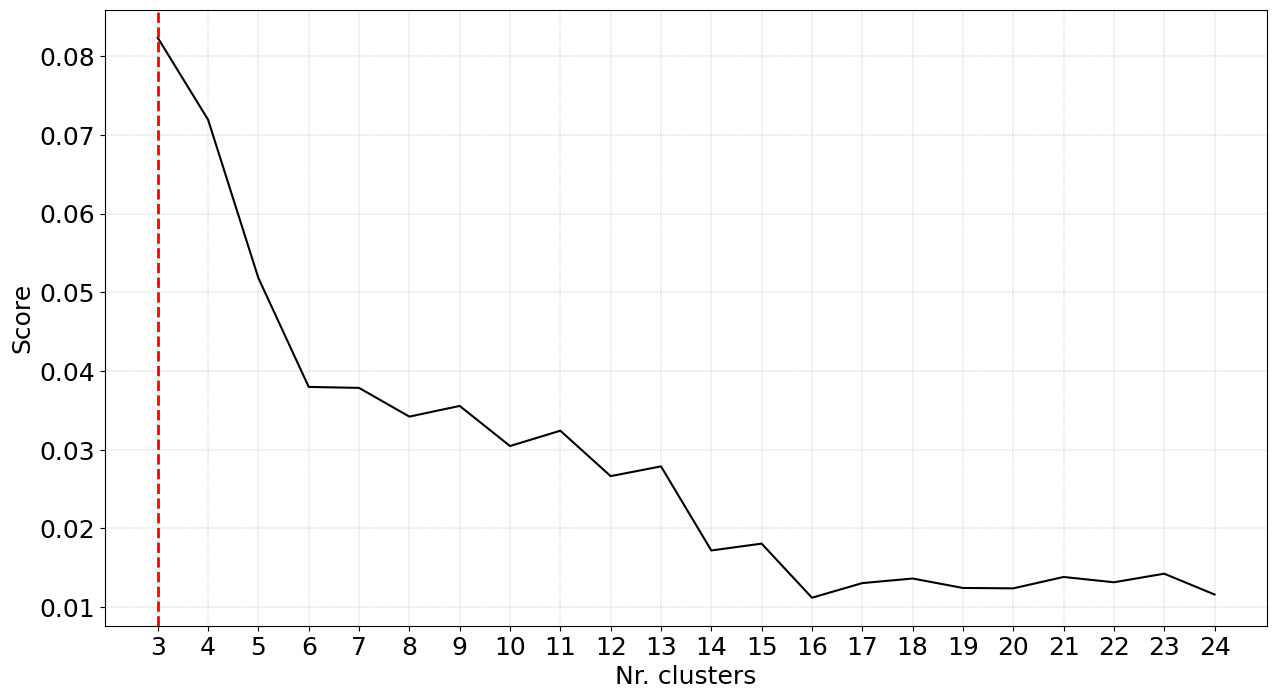

[clustimage] >INFO> Coordinates (x, y) are set based on the first two features.
[clustimage] >INFO> Set alpha based on density because of the parameter: [opaque]
[clustimage] >INFO> Create scatterplot
[clustimage] >INFO> Retrieving input data set.
[clustimage] >INFO> Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=22265.915. Be patient now..
[clustimage] >INFO> Compute cluster labels.


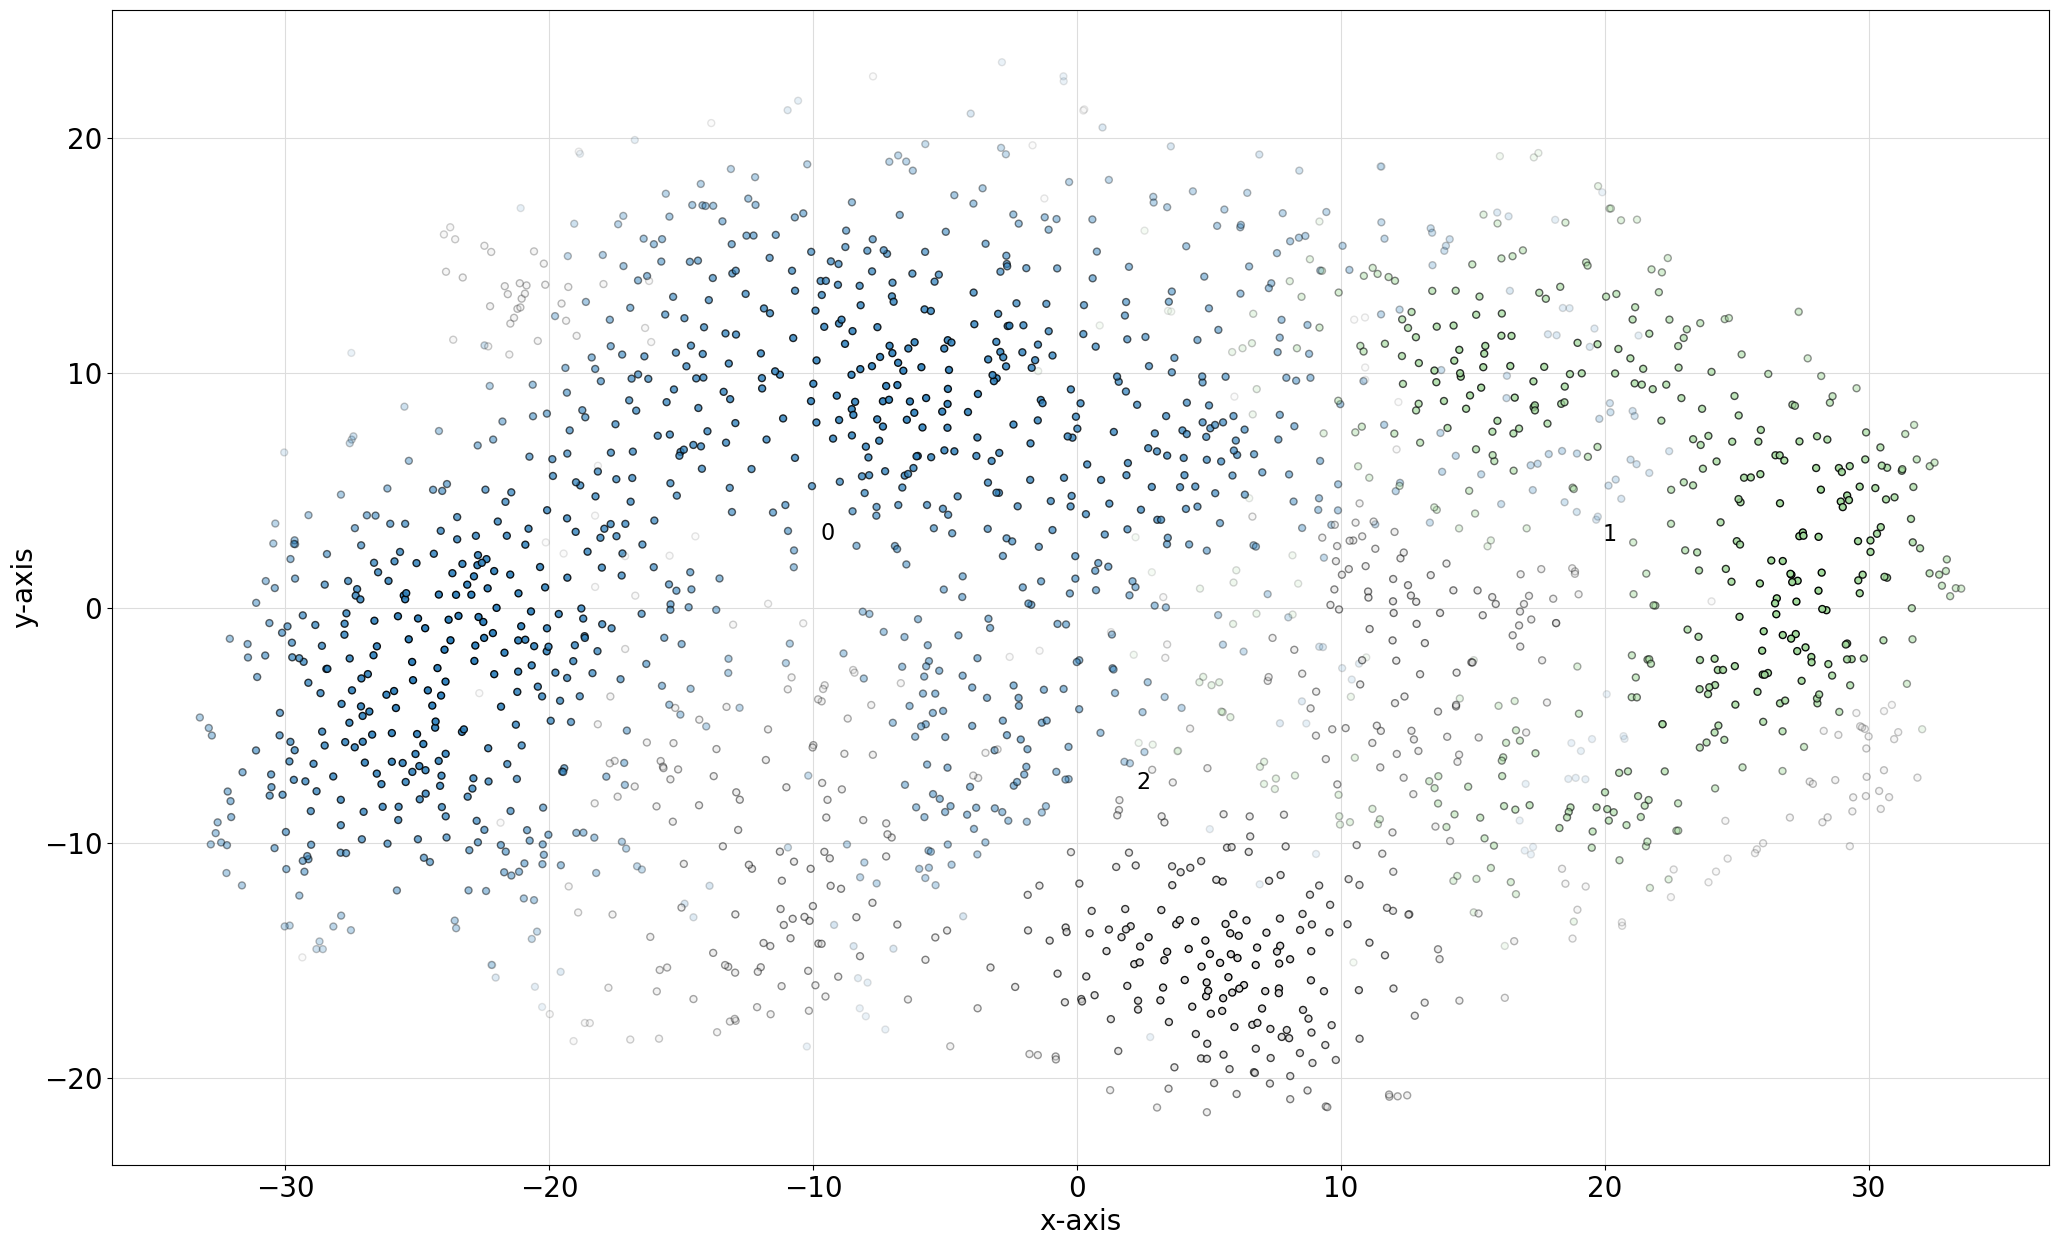

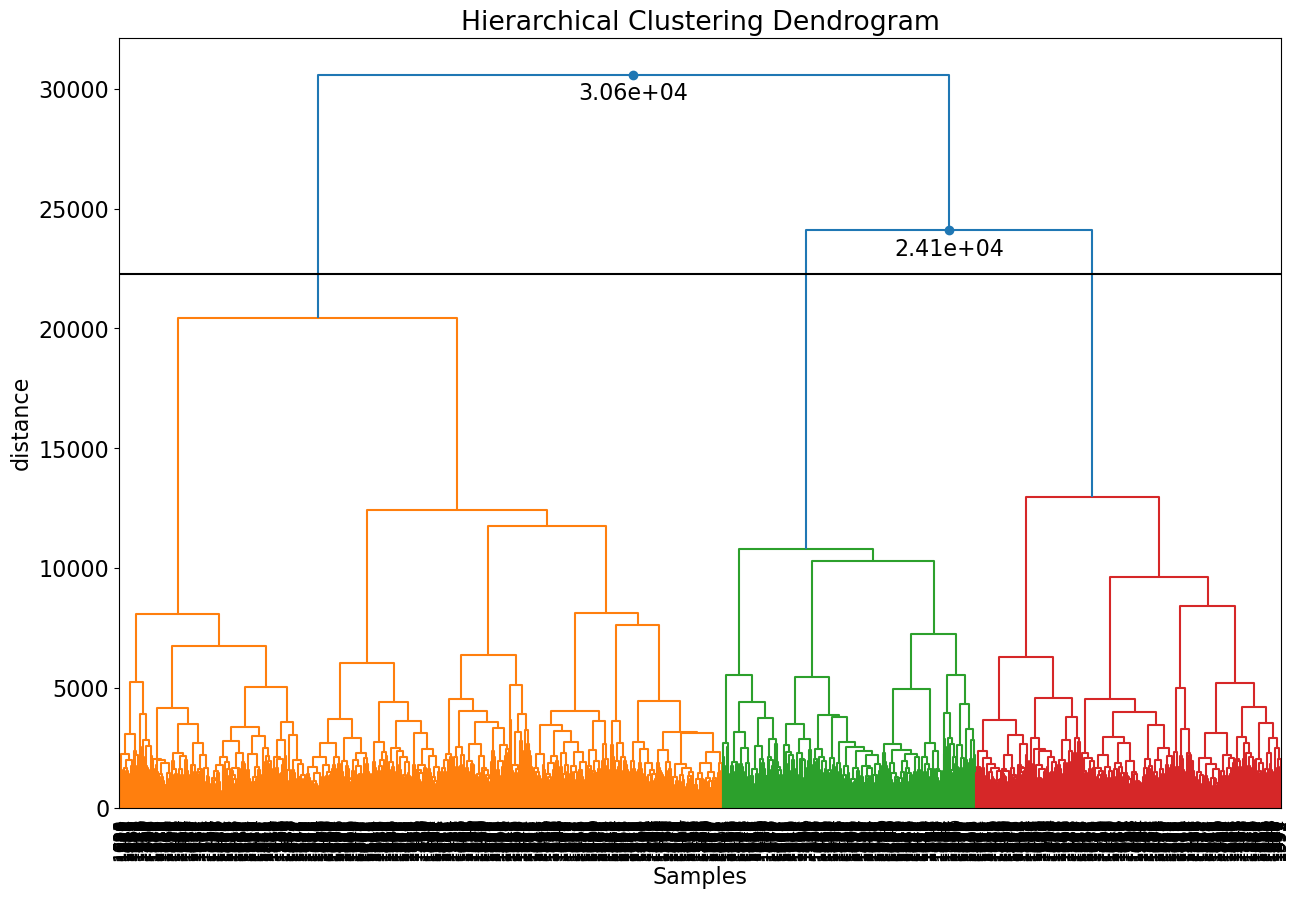

In [4]:
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])
cl.dendrogram();

In [5]:
results_find = cl.find(pathnames, k=2, alpha=0.05)
print(results_find)

{'feat':                      PC1         PC2         PC3         PC4         PC5  \
Cat_386.jpg  -443.395892  185.854419  615.850258 -203.055849 -144.946926   
Dog_379.jpg   839.412018 -819.577385 -420.837538  129.364170 -125.233742   
Cat_15.jpg  -1184.886380   24.106760 -637.229093   68.491476  317.173766   
Cat_392.jpg   443.319703  607.267607 -281.337310   -4.626036 -347.588626   
Dog_423.jpg  -508.075775  -22.669541  129.821651 -261.755508 -141.598761   
...                  ...         ...         ...         ...         ...   
Cat_18.jpg   -345.513040 -531.615696 -381.305116  -68.734902 -191.618249   
Dog_2.jpg     775.219409  235.210108  254.339984   17.446006 -255.849783   
Dog_374.jpg   907.339522  580.134546 -104.556258 -449.438929  342.150358   
Dog_360.jpg   354.168763  471.722625 -203.841952  128.918590 -139.944080   
Dog_406.jpg    26.548983  -79.851924 -444.604361  -87.318655  -58.198063   

                    PC6         PC7         PC8         PC9        PC10  ...  